### Flight Price Prediction

In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [352]:
data = pd.read_excel("Flight_Train.xlsx")

In [353]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [354]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [355]:
#All columns except the output is categorical

In [356]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


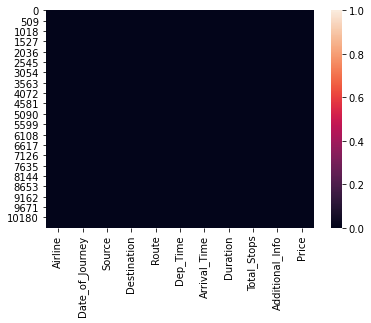

In [357]:
sns.heatmap(data.isnull())

In [358]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [359]:
#No null values except in Total stops(1 nan value). so we can drop that row

In [360]:
data.dropna(inplace=True)

In [361]:
#methods for extracting day and month from given string date column
from datetime import datetime

#extract the day from date
def seperate_day(date_str):
    date_object = datetime.strptime(date_str, '%d/%m/%Y').date()
    return date_object.day
    
#extract the month from date
def seperate_month(date_str):
    date_object = datetime.strptime(date_str, '%d/%m/%Y').date()
    return date_object.month

#check the given date is weekend or not
def weekend(date_str):
    date_object = datetime.strptime(date_str, '%d/%m/%Y').date()
    if date_object.weekday() < 5:
        return 0
    else:
        return 1

In [362]:
data['doj'] = data["Date_of_Journey"].apply(seperate_day)

In [363]:
data['moj'] = data["Date_of_Journey"].apply(seperate_month)

In [364]:
data['weekend'] = data["Date_of_Journey"].apply(weekend)

In [365]:
#now we can drop the Date_of_Journey column
data.drop("Date_of_Journey", axis=1, inplace=True)

In [366]:
#since the Route and Total_Stops gives the same info, we can drop Route
data.drop("Route", axis=1, inplace=True)

In [367]:
data["dep_hr"] = data["Dep_Time"].apply((lambda x: int(x.split(":")[0])))
data["dep_min"] = data["Dep_Time"].apply((lambda x: int(x.split(":")[1])))
data.drop("Dep_Time", axis=1, inplace=True)

In [368]:
data["arr_hr"] = data["Arrival_Time"].apply((lambda x: int((x.split()[0]).split(":")[0])))
data["arr_min"] = data["Arrival_Time"].apply((lambda x:int((x.split()[0]).split(":")[1])))
data.drop("Arrival_Time", axis=1, inplace=True)

In [369]:
#find the hour part of duration column
def get_hour(word):
    s_word = word.split()
    if len(s_word) < 2:
        if 'h' in s_word[0]:
            return s_word[0].split('h')[0]
        else:
            return 0
    else:
        return s_word[0].split('h')[0]

#find the minute part of duration column
def get_minute(word):
    s_word = word.split()
    if len(s_word) < 2:
        if 'h' in s_word[0]:
            return 0
        else:
            return s_word[0].split('m')[0]
    else:
        return s_word[1].split('m')[0]
   
#find the total time of flight in minutes
def get_tot(text):
    hr = int(get_hour(text))*60
    minut = int(get_minute(text))
    return hr + minut

In [370]:
data["dur_min"] = data["Duration"].apply(get_tot)

In [371]:
data.drop("Duration", axis=1, inplace=True)

In [372]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [373]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [374]:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [375]:
data.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Additional_Info    object
Price               int64
doj                 int64
moj                 int64
weekend             int64
dep_hr              int64
dep_min             int64
arr_hr              int64
arr_min             int64
dur_min             int64
dtype: object

In [376]:
def get_stops(text):
    if text == 'non-stop':
        return 0
    else:
        return int(text.split()[0])

In [377]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,doj,moj,weekend,dep_hr,dep_min,arr_hr,arr_min,dur_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,1,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,0,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,1,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,1,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,0,16,50,21,35,285


In [378]:
data['stops'] = data["Total_Stops"].apply(get_stops)
data.drop("Total_Stops", inplace=True, axis=1)

In [379]:
data

,Airline,Source,Destination,Additional_Info,Price,doj,moj,weekend,dep_hr,dep_min,arr_hr,arr_min,dur_min,stops
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,1,22,20,1,10,170,0
1,Air India,Kolkata,Banglore,No info,7662,1,5,0,5,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,1,9,25,4,25,1140,2
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,1,18,5,23,30,325,1
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,0,16,50,21,35,285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,No info,4107,9,4,0,19,55,22,25,150,0
10679,Air India,Kolkata,Banglore,No info,4145,27,4,1,20,45,23,20,155,0
10680,Jet Airways,Banglore,Delhi,No info,7229,27,4,1,8,20,11,20,180,0
10681,Vistara,Banglore,New Delhi,No info,12648,1,3,0,11,30,14,10,160,0


In [380]:
data.dtypes

Airline            object
Source             object
Destination        object
Additional_Info    object
Price               int64
doj                 int64
moj                 int64
weekend             int64
dep_hr              int64
dep_min             int64
arr_hr              int64
arr_min             int64
dur_min             int64
stops               int64
dtype: object

In [381]:
data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [382]:
#78% of the data are No info. so we can drop that

In [383]:
data.drop("Additional_Info", axis=1, inplace=True)

In [384]:
data

,Airline,Source,Destination,Price,doj,moj,weekend,dep_hr,dep_min,arr_hr,arr_min,dur_min,stops
0,IndiGo,Banglore,New Delhi,3897,24,3,1,22,20,1,10,170,0
1,Air India,Kolkata,Banglore,7662,1,5,0,5,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,13882,9,6,1,9,25,4,25,1140,2
3,IndiGo,Kolkata,Banglore,6218,12,5,1,18,5,23,30,325,1
4,IndiGo,Banglore,New Delhi,13302,1,3,0,16,50,21,35,285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,4107,9,4,0,19,55,22,25,150,0
10679,Air India,Kolkata,Banglore,4145,27,4,1,20,45,23,20,155,0
10680,Jet Airways,Banglore,Delhi,7229,27,4,1,8,20,11,20,180,0
10681,Vistara,Banglore,New Delhi,12648,1,3,0,11,30,14,10,160,0


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


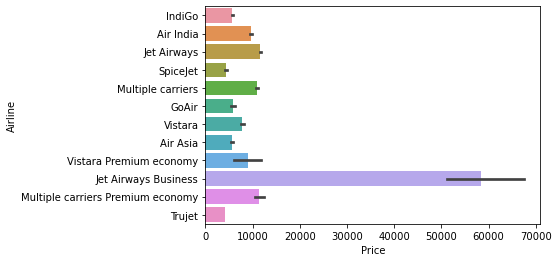

In [385]:
sns.barplot(data.Price, data.Airline)

In [386]:
#Jet airways is the most expensive flight 

In [387]:
data.head()

,Airline,Source,Destination,Price,doj,moj,weekend,dep_hr,dep_min,arr_hr,arr_min,dur_min,stops
0,IndiGo,Banglore,New Delhi,3897,24,3,1,22,20,1,10,170,0
1,Air India,Kolkata,Banglore,7662,1,5,0,5,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,13882,9,6,1,9,25,4,25,1140,2
3,IndiGo,Kolkata,Banglore,6218,12,5,1,18,5,23,30,325,1
4,IndiGo,Banglore,New Delhi,13302,1,3,0,16,50,21,35,285,1


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


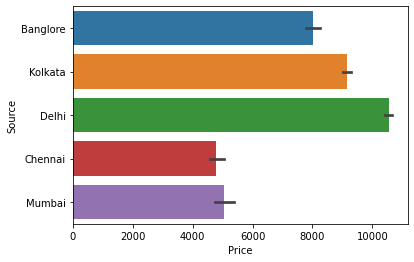

In [388]:
sns.barplot(data.Price, data.Source)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


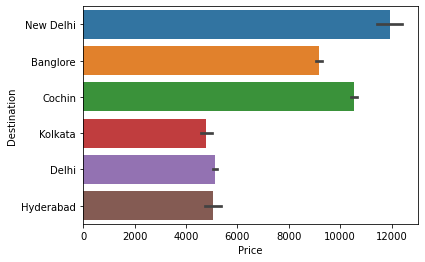

In [389]:
sns.barplot(data.Price, data.Destination)

In [390]:
#check is there any price change related to the  month for a particular airline

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


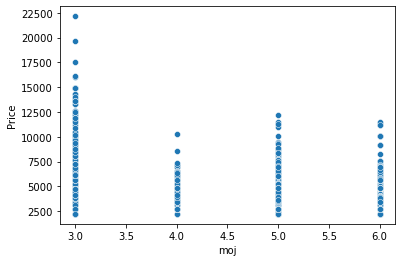

In [391]:
#Indigo
sns.scatterplot(data[data['Airline'] == 'IndiGo'].moj, data[data['Airline'] == 'IndiGo'].Price)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


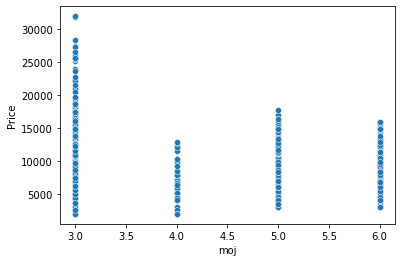

In [392]:
#Air India
sns.scatterplot(data[data['Airline'] == 'Air India'].moj, data[data['Airline'] == 'Air India'].Price)

In [393]:
#we can see that at the starting of the year, the price will be higher

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


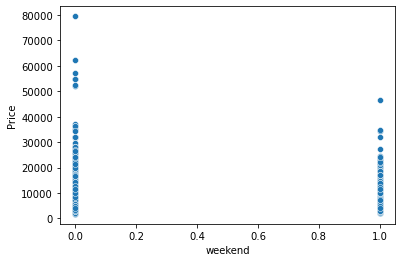

In [394]:
sns.scatterplot(data.weekend, data.Price)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


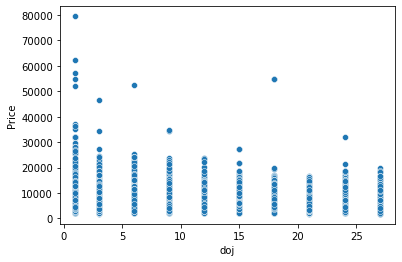

In [395]:
# check how day of month is related to price
sns.scatterplot(data.doj, data.Price)

In [396]:
#Price will be higher in the starting of a month

In [397]:
data.head()

,Airline,Source,Destination,Price,doj,moj,weekend,dep_hr,dep_min,arr_hr,arr_min,dur_min,stops
0,IndiGo,Banglore,New Delhi,3897,24,3,1,22,20,1,10,170,0
1,Air India,Kolkata,Banglore,7662,1,5,0,5,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,13882,9,6,1,9,25,4,25,1140,2
3,IndiGo,Kolkata,Banglore,6218,12,5,1,18,5,23,30,325,1
4,IndiGo,Banglore,New Delhi,13302,1,3,0,16,50,21,35,285,1


D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


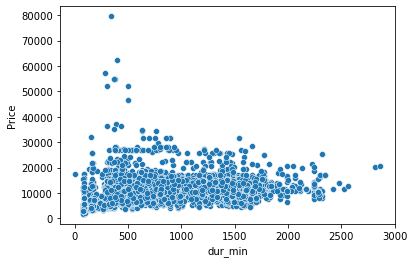

In [398]:
sns.scatterplot(data.dur_min,data.Price)

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


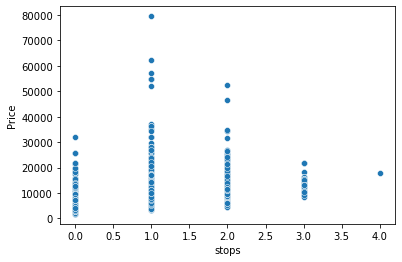

In [399]:
sns.scatterplot(data.stops,data.Price)

In [400]:
#price is higher when no. of stop is one

D:\PROGRAM_FILES\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


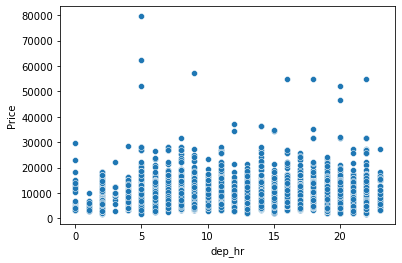

In [401]:
sns.scatterplot(data.dep_hr,data.Price)

In [402]:
#price is less when the time of departure is very late at night

In [403]:
data.head()

,Airline,Source,Destination,Price,doj,moj,weekend,dep_hr,dep_min,arr_hr,arr_min,dur_min,stops
0,IndiGo,Banglore,New Delhi,3897,24,3,1,22,20,1,10,170,0
1,Air India,Kolkata,Banglore,7662,1,5,0,5,50,13,15,445,2
2,Jet Airways,Delhi,Cochin,13882,9,6,1,9,25,4,25,1140,2
3,IndiGo,Kolkata,Banglore,6218,12,5,1,18,5,23,30,325,1
4,IndiGo,Banglore,New Delhi,13302,1,3,0,16,50,21,35,285,1


In [404]:
from sklearn.preprocessing import LabelEncoder
columns = ["Airline", "Source", "Destination"]
for i in columns:
    le = LabelEncoder()
    le.fit(data[i])
    data[i] = le.transform(data[i])

In [405]:
data.head()

,Airline,Source,Destination,Price,doj,moj,weekend,dep_hr,dep_min,arr_hr,arr_min,dur_min,stops
0,3,0,5,3897,24,3,1,22,20,1,10,170,0
1,1,3,0,7662,1,5,0,5,50,13,15,445,2
2,4,2,1,13882,9,6,1,9,25,4,25,1140,2
3,3,3,0,6218,12,5,1,18,5,23,30,325,1
4,3,0,5,13302,1,3,0,16,50,21,35,285,1


In [406]:
x = data.loc[:,data.columns != 'Price']

In [407]:
y = data.loc[:,'Price']

In [408]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [409]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    if r2 > max_acc:
        max_acc = r2
        max_rs = i
print("Best random state=",max_rs)

Best random state= 51


In [410]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 51)

In [411]:
models = {"SVR":SVR(),"KNN":KNeighborsRegressor(), "RandomForest":RandomForestRegressor(),"LinearRegression":LinearRegression(), "Ridge":Ridge(), "dtr":DecisionTreeRegressor() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    #mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    r2_sc = r2_score(y_test,pred)
    acc[i] = r2_sc
    mod_list.append(mod)
print(acc)

{'SVR': 0.19119336435155632, 'KNN': 0.5969839588046797, 'RandomForest': 0.8364583704177578, 'LinearRegression': 0.4837931946840811, 'Ridge': 0.4838105238764243, 'dtr': 0.7294472403603764}


In [412]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [413]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVR()': 0.17012922573026978, 'KNeighborsRegressor()': 0.5616773650843129, 'RandomForestRegressor()': 0.8045097002569327, 'LinearRegression()': 0.435299774143343, 'Ridge()': 0.435300631037881, 'DecisionTreeRegressor()': 0.6760283776372914}


In [414]:
#Randomforest is the best model

In [415]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [416]:
param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [417]:
GCV = GridSearchCV(RandomForestRegressor(),param_grid=param_grid, cv=7)

In [418]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [419]:
GCV.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 9}

In [420]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [421]:
r2_score(y_test, GCV_predict)

0.8377129700473241

In [422]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "Flight.obj")

['Flight.obj']

In [423]:
#prepare the test data

In [424]:
test_data = pd.read_excel("Flight_Test.xlsx")

In [425]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [426]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [427]:
test_data['doj'] = test_data["Date_of_Journey"].apply(seperate_day)
test_data['moj'] = test_data["Date_of_Journey"].apply(seperate_month)
test_data['weekend'] = test_data["Date_of_Journey"].apply(weekend)
test_data.drop("Date_of_Journey", axis=1, inplace=True)
test_data.drop("Route", axis=1, inplace=True)
test_data["dep_hr"] = test_data["Dep_Time"].apply((lambda x: int(x.split(":")[0])))
test_data["dep_min"] = test_data["Dep_Time"].apply((lambda x: int(x.split(":")[1])))
test_data.drop("Dep_Time", axis=1, inplace=True)
test_data["arr_hr"] = test_data["Arrival_Time"].apply((lambda x: int((x.split()[0]).split(":")[0])))
test_data["arr_min"] = test_data["Arrival_Time"].apply((lambda x:int((x.split()[0]).split(":")[1])))
test_data.drop("Arrival_Time", axis=1, inplace=True)
test_data["dur_min"] = test_data["Duration"].apply(get_tot)
test_data.drop("Duration", axis=1, inplace=True)
test_data['stops'] = test_data["Total_Stops"].apply(get_stops)
test_data.drop("Total_Stops", inplace=True, axis=1)
test_data.drop("Additional_Info", axis=1, inplace=True)
columns = ["Airline", "Source", "Destination"]
for i in columns:
    le = LabelEncoder()
    le.fit(test_data[i])
    test_data[i] = le.transform(test_data[i])
test_x = test_data.loc[:,:]

In [428]:
test_x

,Airline,Source,Destination,doj,moj,weekend,dep_hr,dep_min,arr_hr,arr_min,dur_min,stops
0,4,2,1,6,6,0,17,30,4,25,655,1
1,3,3,0,12,5,1,6,20,10,20,240,1
2,4,2,1,21,5,0,19,15,19,0,1425,1
3,6,2,1,21,5,0,8,0,21,0,780,1
4,0,0,2,24,6,0,23,55,2,45,170,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,6,6,0,20,30,20,25,1435,1
2667,3,3,0,27,3,0,14,20,16,55,155,0
2668,4,2,1,6,3,0,21,50,4,25,395,1
2669,1,2,1,6,3,0,4,0,19,15,915,1


In [429]:
loaded_model = joblib.load(open('Flight.obj', 'rb'))
result = loaded_model.predict(test_x)
print(result)

[12303.06079159  5511.7224587  13270.10701815 ... 13400.25467646
 14406.34320012  8761.79093494]


In [431]:
fil = pd.DataFrame(result)

In [433]:
fil.to_csv("Flight_Out.csv")